# Implementation of ConvNets for Image Classification
-------------------------------------
The following process will be followed to implement convolution neural network for image classification.

In this notebook I have used selenium to webscrape images from Raw pixel website. 

Firstly, we will go over getting the image data and storing the images in two categories as we are trying to predict two categories of class of images. Then these images will be randomly assigned into train and test datasets for two different classes. 

# Problem Statement

For the image classification using CNN, the problem statement is to classify emotions, mainly in two broad categories. Happy vs. Sad. The images have been obtained from website: https://www.rawpixel.com/ (the exact link is in below code in urls dictionary) using selenium web scrapper.This images are of people with happy face and sad face repsectively. Below is an example of image under the subheader: an example image of happy and sad face.


# Code for Downloading Images

Here the following code uses the Selenium library to scrape images from rawpixel website. For this chrome web driver is required in order to get the job done. It basically used to access the chrome browser in a headless mode that is without visible GUI. Other relevant packages are installed to process this.

Key thing here is

1. to provide the url of the website. Here urls dictionary is defined that contains two keys. happy face and Sad face. The number of images to download are speficified. Further directories are created to store these images.

2. The images are either listed by using xPath or CSS metric in html file. In this case xpath did not work (in fact chatgpt and other medium articles and stackoverflow mentioned this parameter for getting images from the image.google . However, I figured that in my case to get images from rawpixel website CSS selector worked.

It was different experience in figuring out using inspect element in web page to see how image is listed and what is the indicating parameter to list the image. :D

The function to download image goes through each page of the web page and stop when total images to download metric is reached (here 500 images)

In [1]:
# installing necessary libraries and ChromeDriver
!!pip install selenium


'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
!!pip install chromedriver

['Collecting chromedriver',
 '  Downloading chromedriver-2.24.1-py2.py3-none-any.whl (14.3 MB)',
 'Installing collected packages: chromedriver',
 'Successfully installed chromedriver-2.24.1']

In [7]:
!!pip install webdriver_manager==3.4.2


['Collecting webdriver_manager==3.4.2',
 '  Downloading webdriver_manager-3.4.2-py2.py3-none-any.whl (16 kB)',
 'Collecting configparser',
 '  Downloading configparser-6.0.0-py3-none-any.whl (19 kB)',
 'Requirement already satisfied: requests in c:\\users\\surya\\anaconda3\\lib\\site-packages (from webdriver_manager==3.4.2) (2.27.1)',
 'Collecting crayons',
 '  Downloading crayons-0.4.0-py2.py3-none-any.whl (4.6 kB)',
 'Requirement already satisfied: colorama in c:\\users\\surya\\anaconda3\\lib\\site-packages (from crayons->webdriver_manager==3.4.2) (0.4.4)',
 'Requirement already satisfied: charset-normalizer~=2.0.0 in c:\\users\\surya\\anaconda3\\lib\\site-packages (from requests->webdriver_manager==3.4.2) (2.0.4)',
 'Requirement already satisfied: urllib3<1.27,>=1.21.1 in c:\\users\\surya\\anaconda3\\lib\\site-packages (from requests->webdriver_manager==3.4.2) (1.26.9)',
 'Requirement already satisfied: idna<4,>=2.5 in c:\\users\\surya\\anaconda3\\lib\\site-packages (from requests->

In [2]:
!!pip install webdriver_manager


['Collecting webdriver_manager',
 '  Downloading webdriver_manager-4.0.1-py2.py3-none-any.whl (27 kB)',
 'Requirement already satisfied: requests in c:\\users\\surya\\anaconda3\\lib\\site-packages (from webdriver_manager) (2.27.1)',
 'Requirement already satisfied: packaging in c:\\users\\surya\\anaconda3\\lib\\site-packages (from webdriver_manager) (21.3)',
 'Collecting python-dotenv',
 '  Downloading python_dotenv-1.0.0-py3-none-any.whl (19 kB)',
 'Requirement already satisfied: pyparsing!=3.0.5,>=2.0.2 in c:\\users\\surya\\anaconda3\\lib\\site-packages (from packaging->webdriver_manager) (3.0.4)',
 'Requirement already satisfied: idna<4,>=2.5 in c:\\users\\surya\\anaconda3\\lib\\site-packages (from requests->webdriver_manager) (3.3)',
 'Requirement already satisfied: certifi>=2017.4.17 in c:\\users\\surya\\anaconda3\\lib\\site-packages (from requests->webdriver_manager) (2021.10.8)',
 'Requirement already satisfied: urllib3<1.27,>=1.21.1 in c:\\users\\surya\\anaconda3\\lib\\site-pac

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import urllib
import time
import os

# Specify the path to the ChromeDriver executable
#chrome_driver_path = r"C:\Users\surya\Downloads\chromedriver_win32\chromedriver"  # Replace with the actual path

# Setting up ChromeOptions with headless mode and other arguments
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36')

# Creating a ChromeDriver instance with the specified options and path to ChromeDriver executable
driver = webdriver.Chrome(options=chrome_options)

# Defining the URLs of the websites to scrape
urls = {
    "happy_people_face": "https://www.rawpixel.com/search/happy%20people%20face?page=1&sort=curated&tags=%24photos&topic_group=%24photos",
    "sad_people_face": "https://www.rawpixel.com/search/sad%20people%20face?page=1&sort=curated&tags=%24photos&topic_group=%24photos"
}

# Total number of images to download for each category
total_images_to_download = 2

# Creating directories to save images using dictionary urls keys
for category in urls.keys():
    if not os.path.exists(category):
        os.makedirs(category)

# This is the function to download images
def download_images(url, category):
    downloaded_image_count = 0
    page_number = 1

    while downloaded_image_count < total_images_to_download:
        try:
            driver.get(url)
            image_elements = driver.find_elements(By.CSS_SELECTOR, 'div.sc-bdce00a3-0.AVvqJ img')

            for image_element in image_elements:
                image_url = image_element.get_attribute('src')
                filename = f"{category}/image_{downloaded_image_count}.jpg"
                urllib.request.urlretrieve(image_url, filename)
                downloaded_image_count += 1

                if downloaded_image_count >= total_images_to_download:
                    break

            page_number += 1
            next_page_url = f"{url}&page={page_number}"
            driver.get(next_page_url)
        except Exception as e:
            print(f"An error occurred: {e}")
            break  # Exit the loop on error

# Downloading images for each category
for category, url in urls.items():
    download_images(url, category)

# Closing the webdriver
driver.quit()


## An example image of happy face

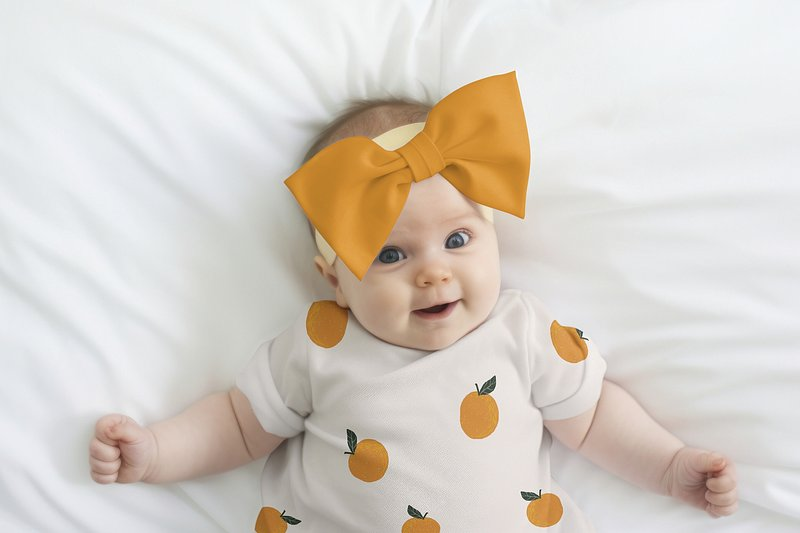

In [ ]:
from IPython.display import Image
Image("happy_people_face/image_10.jpg")

## An example image of sad face

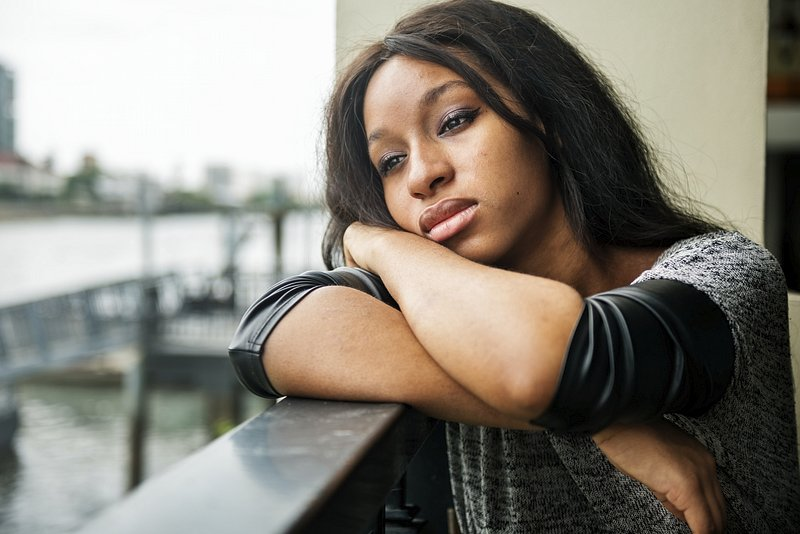

In [ ]:
Image("sad_people_face/image_415.jpg")

# Separating the Train and Test for Two Categorise

In the below code initially the two main directories are assigned as source directories. These two directories contain the sad people faces and happy people faces separately.

Later, train and test directories are made (in case they dont exist) using the makedirs function. Then, files in the directories are listed and further randomised. Lastly, we assign the train and test size of the dataset in order to pull certain number of images in test dataset.

In [ ]:
import os
import random
import shutil

# Source directory where you downloaded the "happy people faces" images
happy_source_dir = '/content/happy_people_face'
sad_source_dir = '/content/sad_people_face'

# Destination directories for train and test sets
train_dir = '/content/train'
test_dir = '/content/test'


# Create the train and test directories if they don't exist
os.makedirs(os.path.join(train_dir, 'happy'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'happy'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'sad'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'sad'), exist_ok=True)

# List all the image files in the source directory
happy_image_files = os.listdir(happy_source_dir)
sad_image_files = os.listdir(sad_source_dir)

# Randomly shuffle the list of image files
random.shuffle(happy_image_files)
random.shuffle(sad_image_files)


# Determine the number of images to use for training and testing
train_size = int(0.8 * len(happy_image_files))  # 80% for training, change this as needed
test_size = len(happy_image_files) - train_size  # Remaining for testing

## Copying files from main directories to train and test

The following code copies the image files from the two main directories where happy and sad people faces are stored seperately to respecitive folders in train and test dataset.

Using enumerate function the for loop iterates over the image files. It verifies if the ```i``` that is the index is less than the ```train_size``` then it copies the image file in the train dataset. Otherwise it copies in the test dataset.

There are two for loops cells below that copies images from ```happy_people_face``` and ```sad_people_faces``` directories to their respective train and test directories using ```shutil.copy()``` method.  

### For happy people face directory

In [ ]:
# Copy happy images to train and test directories
for i, image_file_happy in enumerate(happy_image_files):
    if i < train_size:
        # Copy to the train directory
        src = os.path.join(happy_source_dir, image_file_happy)
        dst = os.path.join(train_dir, 'happy', image_file_happy)
    else:
        # Copy to the test directory
        src = os.path.join(happy_source_dir, image_file_happy)
        dst = os.path.join(test_dir, 'happy', image_file_happy)

    shutil.copyfile(src, dst)


### For sad people faces directory

In [ ]:
# Copy sad images to train and test directories
for i, image_file_sad in enumerate(sad_image_files):
    if i < train_size:
        # Copy to the train directory
        src = os.path.join(sad_source_dir, image_file_sad)
        dst = os.path.join(train_dir, 'sad', image_file_sad)
    else:
        # Copy to the test directory
        src = os.path.join(sad_source_dir, image_file_sad)
        dst = os.path.join(test_dir, 'sad', image_file_sad)

    shutil.copyfile(src, dst)

# Image Data Generator

In the below image data generator code, the data augmentation is used to get the desired features from the data and reduce the background clutter. The image is rescales, rotated, sheared, zoomed, shifted horizontally and vertically. These all changes are performed on the train dataset. The test dataset is just rescaled.

Here, the target size of image is also mentioned in order to have uniformity in the images dataset so that it can be well processed in dense layers of neural netowrk.

We can see that there are total 800 images in train and 200 images in test classes combined.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)
target_size=(500,500)
batch_size=10

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=target_size,
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary')

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 500, 500, 3)
labels batch shape: (10,)


Above we can see that the batch size is 10 , then the image size is 500 x 500 and it is a colorful images as we see 3 channels.

# Building Model

The ConvNet model is build using Sequential APIs. More layers of convolutions are applied in order to get more details of the images.

The dropout layers are used so that model does not to overfit the data

In [ ]:
input_shape=(*target_size,3) #input shape coded such that if image target size is changed we need not do hard coding

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=input_shape)) # this needs to match with our data prep - upcoming!
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 123, 123, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 60, 60, 128)       0

# Compile The Model

The model is compiled using ```adam``` optimiser and metric is accuracy that we want to maximise.

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

# Fit the Model

While fitting the model, early stopping is introduced with some patience so that the model doesnt get local minima. That is to say that model will still be checking for accuracy even when high accuracy is reached for that zone so that it doesnt get lost in local minima.

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc',
                                   mode='max', # don't minimize the accuracy!
                                   patience=20,
                                   restore_best_weights=True)

import time

start = time.time()
print("hello")

history = model.fit(
      train_generator,
      steps_per_epoch=80, # ideally...len(trainX) // BS == 2000/20  == 100
      epochs=20,
      callbacks=[es],
      validation_data=test_generator,
      validation_steps=10)  # ideally...len(valX) // BS == 1000/20 == 50
                            # Total number of steps (batches of samples) to validate before stopping.

end = time.time()
print(end - start)

hello
Epoch 1/20
80/80 [==============================] - 464s 6s/step - loss: 0.7598 - acc: 0.6650 - val_loss: 0.4257 - val_acc: 0.7700
Epoch 2/20
80/80 [==============================] - 434s 5s/step - loss: 0.4868 - acc: 0.7862 - val_loss: 0.3842 - val_acc: 0.8200
Epoch 3/20
80/80 [==============================] - 437s 5s/step - loss: 0.4558 - acc: 0.8000 - val_loss: 0.4479 - val_acc: 0.8000
Epoch 4/20
80/80 [==============================] - 441s 6s/step - loss: 0.4379 - acc: 0.8050 - val_loss: 0.4689 - val_acc: 0.8100
Epoch 5/20
80/80 [==============================] - 488s 6s/step - loss: 0.4504 - acc: 0.8000 - val_loss: 0.3539 - val_acc: 0.8700
Epoch 6/20
80/80 [==============================] - 449s 6s/step - loss: 0.4907 - acc: 0.8037 - val_loss: 0.4184 - val_acc: 0.8300
Epoch 7/20
80/80 [==============================] - 424s 5s/step - loss: 0.4156 - acc: 0.8338 - val_loss: 0.4368 - val_acc: 0.8100
Epoch 8/20
80/80 [==============================] - 414s 5s/step - loss: 0.39

In [ ]:
model.save('/content/drive/MyDrive/Intro to Deep Learning (Fall 23) /Module 3/A4/model_1.h5', overwrite=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


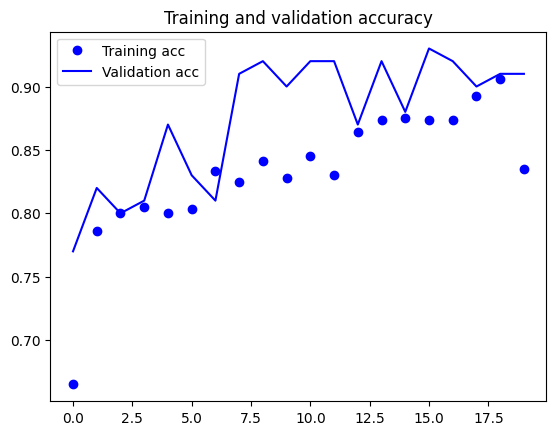

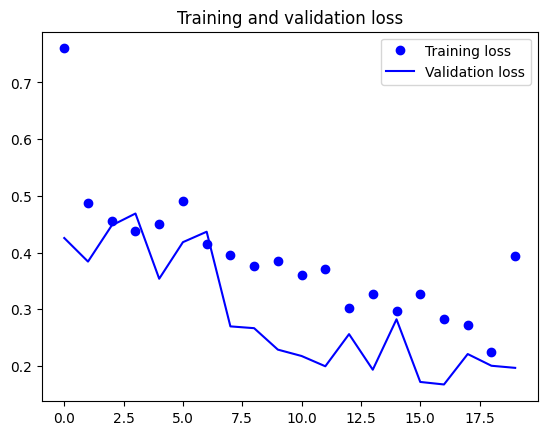

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# for simplicity, let's just round
# you are welcome to try finding an optimal cut-off on your own
import numpy as np
tmp = model.predict(test_generator)
print(tmp.shape)
print(tmp[0:5])
pred = np.round(tmp,0)
print(pred.shape)
print(pred[0:5])

20/20 [==============================] - 37s 2s/step
(200, 1)
[[0.06324624]
 [0.36023998]
 [0.77170116]
 [0.10283115]
 [0.3476995 ]]
(200, 1)
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [ ]:
test_generator.labels

In [ ]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [ ]:
import pandas as pd
my_results = pd.DataFrame(columns=['actual','pred'])
batches = 0
for x_val, y_val in test_generator:
  batches=batches+1
  y_pred = model.predict(x_val)
  y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results = my_results.append(tmp)
  if batches >= 200 // batch_size  # hard-coded the 200 and 10 , the number of images and steps_per_epoch
    # we need to break the loop by hand because
    # the generator loops indefinitely
    break

I had thought of removing this hard coded code to make it more dynamic. But I forgot to add this as I was experimenting with model and getting good data in quality and quantity using web scraper.

In [ ]:
# close but not perfect!
my_results

,actual,pred
0,0.0,0.063246
1,0.0,0.360240
2,1.0,0.771701
3,0.0,0.102831
4,0.0,0.347699
...,...,...
5,1.0,0.440574
6,1.0,0.999996
7,0.0,0.212666
8,1.0,0.991181


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       100
         1.0       0.98      0.83      0.90       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

[[98  2]
 [17 83]]


# Insights / Conclusion

1. This exercise was real fun to figure out how more images can be downloaded from the web. The bing downloader limited the download of images to around 170 images. Above all, I could see that it also had lot of irrelevant images. This does play a crucial role in model training and development. Because if the data in itself is junk, we can not expect model to have good accuracy.

2. The model accuracy using 150 images of sad and happy people faces (each 150 images) was not that great. The F1 score was 0.67. Clearly, good data was required in terms of quality and quantity.

3. I figured to use Selenium web scrapper to download images from Rawpixel website. I was able to get 500 images in each category of happy, sad people faces. I could have tried to download 500+ images but chose to first try to model the CNN using 500 to see how big a difference the data does for the same model parameters.

4. Using the new data with total of 800 images combined in train and 200 in test data, I was able to get F1 score as 0.76 for the same model parameters (that is the number of layers and unit) used in earlier model.

5. Further, this model was fine tuned and I was able to achieve F1 score of 0.90. This was a huge improvement, going from 0.76 to 0.85 ish and finally to 0.90. I used dropout in the fully connected dense layers. I also tried using dropouts in the convolution layers but those results were very poor (i got 0.35 F1 in that case). I then removed those dropout (i had used 0.25 dropouts).

6. It was observed that the model that had F1 score of 0.90, seemed to underfit the data. This is because the validation accuracy curve was above the training accuracy curve. The same was the pattern for the validation loss curve, it was below the training loss curve. The model was then put with another convolution layer with 512 feature maps as output to see how model behaves.









## More on the best model so far


I actually lost the full run collab (of the best model that I got so far) as i tried to change some stuff and there was some error. Nonethless, following are the result that I got in another model where I used additional convolution layer, dropout in dense layer. The model predicted one class 100% right. Following are the screen shot of F1 score and the accuracy and loss curve.


I observed that initially when there were few convolution layers the model actually underfitted the data. The F1 score was somewhere around 0.85. Then I got the convolution layers added along with the dropout layer to avoid overfitting and I was able to get this model.

It can be seen that the validation accuracy is high comapred to the train and it is pretty inlined with train accuracy. Not something like an underfitting model. Similar we can say with the validation loss, which is less than the training loss.

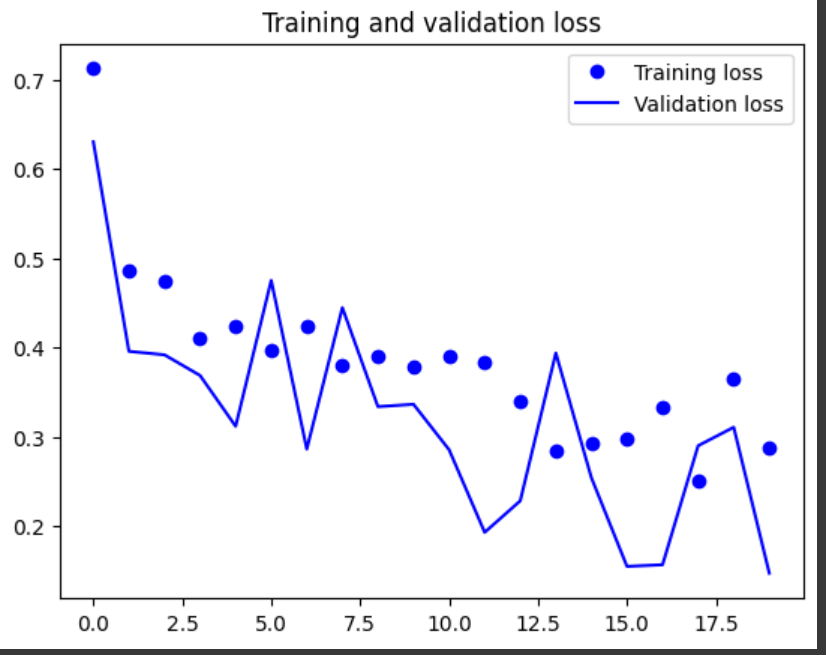

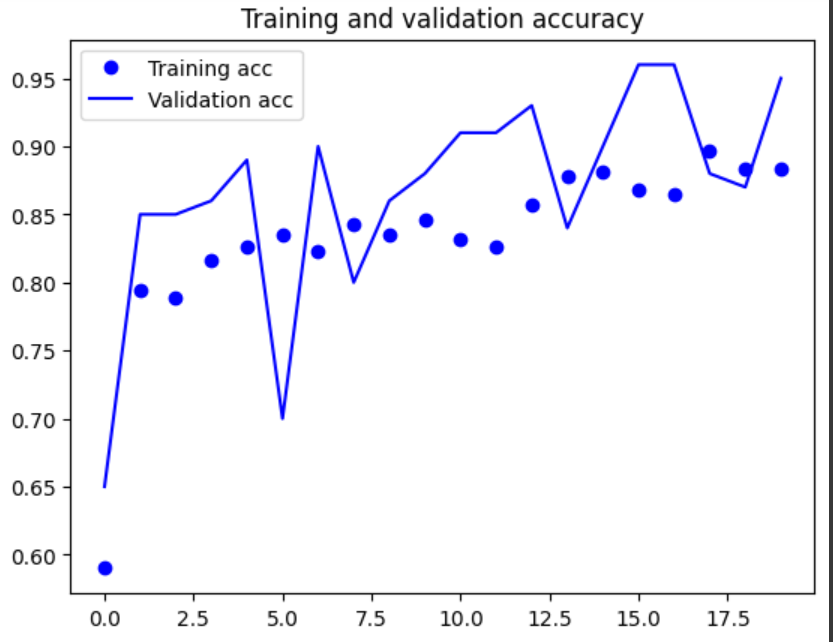

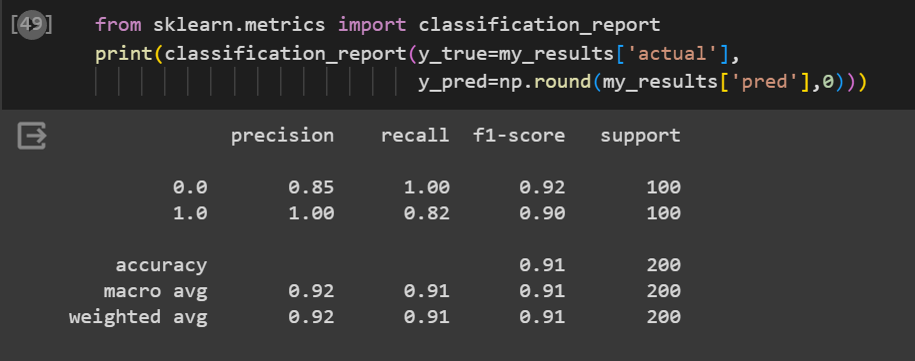

## Insights on the classification of best model so far

It amazing to see that one class is predicted 100% right. The other class has some misclassification.

The reason could be that there might be some or other irrelevant images. Those may not be many but still it could be the case. Further, having more number of people in image might make it a complex data to process as well.

Another observation could be that the sad images are where head is down , or face is hiddden, in such scenarios it becomes difficult to identify the face features different from the background noise.

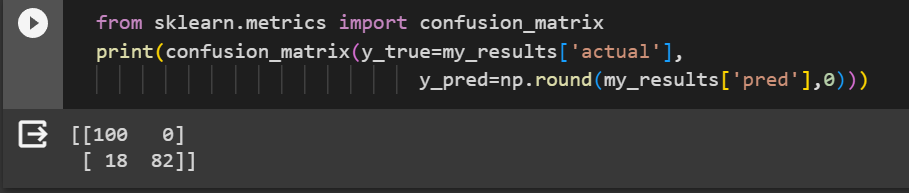